In [1]:
import pandas as pd

df = pd.read_csv('Data/regression_test.csv')
df.head(3)

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194


In [3]:
import torch

X = torch.from_numpy(df['x'].values).unsqueeze(1).float()     # 1차원 >> 2차원으로.
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

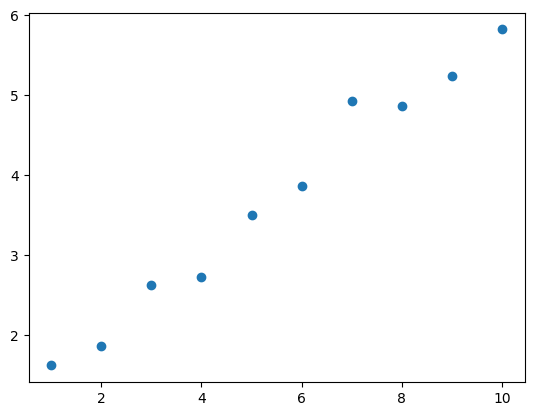

In [4]:
import matplotlib.pyplot as plt
import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [5]:
from torch import nn
model = nn.Linear(in_features = 1, out_features=1, bias = True)
print(model)


Linear(in_features=1, out_features=1, bias=True)


In [6]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.8215]], requires_grad=True)
Parameter containing:
tensor([-0.0648], requires_grad=True)


In [7]:
criterion = nn.MSELoss()         
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)
print(model(X))

tensor([[-0.8863],
        [-1.7078],
        [-2.5294],
        [-3.3509],
        [-4.1724],
        [-4.9939],
        [-5.8154],
        [-6.6369],
        [-7.4584],
        [-8.2799]], grad_fn=<AddmmBackward0>)


In [8]:
for step in range(500):
    prediction = model(X)
    loss = criterion(input = prediction, target = y)     # 손실계산
    optimizer.zero_grad()          # 가중치 초기화
    loss.backward()                # 역전파 계산
    optimizer.step()               # 가중치 수정
    print(f'ecpoch:{step}, loss: {loss:.3f}')

ecpoch:0, loss: 82.793
ecpoch:1, loss: 81.505
ecpoch:2, loss: 80.228
ecpoch:3, loss: 78.961
ecpoch:4, loss: 77.704
ecpoch:5, loss: 76.459
ecpoch:6, loss: 75.225
ecpoch:7, loss: 74.002
ecpoch:8, loss: 72.790
ecpoch:9, loss: 71.590
ecpoch:10, loss: 70.401
ecpoch:11, loss: 69.224
ecpoch:12, loss: 68.059
ecpoch:13, loss: 66.906
ecpoch:14, loss: 65.765
ecpoch:15, loss: 64.636
ecpoch:16, loss: 63.520
ecpoch:17, loss: 62.415
ecpoch:18, loss: 61.324
ecpoch:19, loss: 60.244
ecpoch:20, loss: 59.177
ecpoch:21, loss: 58.123
ecpoch:22, loss: 57.081
ecpoch:23, loss: 56.052
ecpoch:24, loss: 55.036
ecpoch:25, loss: 54.032
ecpoch:26, loss: 53.041
ecpoch:27, loss: 52.062
ecpoch:28, loss: 51.097
ecpoch:29, loss: 50.144
ecpoch:30, loss: 49.203
ecpoch:31, loss: 48.276
ecpoch:32, loss: 47.360
ecpoch:33, loss: 46.458
ecpoch:34, loss: 45.568
ecpoch:35, loss: 44.690
ecpoch:36, loss: 43.825
ecpoch:37, loss: 42.972
ecpoch:38, loss: 42.132
ecpoch:39, loss: 41.303
ecpoch:40, loss: 40.487
ecpoch:41, loss: 39.683
ec

In [9]:
model(X)

tensor([[1.6455],
        [2.1089],
        [2.5724],
        [3.0358],
        [3.4992],
        [3.9627],
        [4.4261],
        [4.8895],
        [5.3530],
        [5.8164]], grad_fn=<AddmmBackward0>)

In [10]:
def mse_loss(preds, trues):
    return torch.sum((preds - trues)**2)/preds.view(-1).shape[0]    # .view(-1).shape[0]: 1차원으로 변경

mse_loss(model(X), y)

tensor(0.0444, grad_fn=<DivBackward0>)

In [11]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.04442506283521652, 0.4634318947792053, 1.1820648908615112)

In [12]:
def display_results(model, x,y):
    pred = model(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
    plt.show()

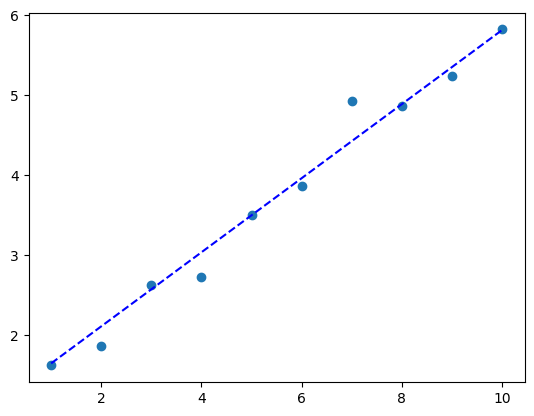

In [13]:
display_results(model, X,y)